### 1、Import tensorflow and use tensorflow to define a constant.

In [15]:
# -*- coding:utf-8 -*- 
import  tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

### 2、Use tensorflow to print 'Welcome to Huawei'.

In [16]:
wlc = tf.constant('Welcome to Huawei')
with tf.Session() as sess: 
    print (sess.run(wlc))
sess.close() 

b'Welcome to Huawei'


### 3、Use tensorflow to define two numeric constants,then calculate them and print the result.

In [17]:
a = tf.constant(3)
b = tf.constant(4)

with tf.Session() as sess:
    print("Add:  %i" % sess.run(a+b))

    print ("Multiply:  %i" % sess.run(a*b)) 

Add:  7
Multiply:  12


### 4、Randomly generate two matrices using tensorflow, calculate and print the result of their multiplication.

In [18]:
with tf.Session() as sess:

    w1 = tf.Variable(tf.random_normal([2,2],mean=1.0, stddev=1.0))
    w2 = tf.Variable(tf.random_normal([2,1],mean=1.0, stddev=1.0))
    tf.global_variables_initializer().run()
    a = tf.matmul(w1,w2)
    print(a.eval())

[[4.285428 ]
 [0.2795689]]


### 5、Try to use your own handwriting number to do image recognition

In [19]:
# -*- coding:utf-8 -*- 
import  tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [20]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
import time
import cv2
import matplotlib.pyplot as plt

In [21]:
mnist = tf.keras.datasets.mnist.load_data()
mnist_x_train = mnist[0][0] # x_train
mnist_y_train = mnist[0][1] # y_train
mnist_x_test = mnist[1][0] # x_test
mnist_y_test = mnist[1][1] # y_test

#batch_xs = mnist_x_train[:batch_num]
#batch_ys = mnist_y_train[:batch_num]

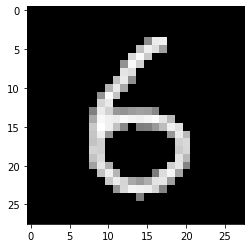

(1, 784)

In [22]:
def make_label(label_num):
    label = np.zeros((1,10),dtype='float32')
    label[:,label_num] = 1.0
    return label

label_test = make_label(6)
# the path of image
img_path = "More\data\\self_data\\6.jpg"
img_file = cv2.imread(img_path)
img_file = cv2.cvtColor(img_file, cv2.COLOR_RGB2GRAY)
img_file = 255 - img_file
for row in range(img_file.shape[0]):
    for col in range(img_file.shape[1]):
        if img_file[row][col] < 120.0:
            img_file[row][col] = 0
plt.imshow(img_file,'gray')
plt.show()
data_test = img_file / 255
data_test = np.float32(img_file.reshape(1, 28*28))
data_test.shape

In [23]:
input_num = 784
h1_num = 512
epochs = 3000
batch_num = 1000
lr = 0.09
W1 = tf.Variable(tf.truncated_normal([input_num, h1_num],stddev=0.1))
W2 = tf.Variable(tf.zeros([h1_num,10]))
B1 = tf.Variable(tf.zeros([h1_num]))
B2 = tf.Variable(tf.zeros([10]))
x = tf.placeholder(tf.float32, [None, input_num])
keep_prob = tf.placeholder(tf.float32)
label = tf.placeholder(tf.float32, [None,10])

hidden1 = tf.nn.relu(tf.matmul(x,W1) + B1)
hidden1_drop = tf.nn.dropout(hidden1, keep_prob)
y = tf.nn.softmax(tf.matmul(hidden1_drop, W2) + B2)

cross_entropy = tf.reduce_mean(-tf.reduce_sum(label * tf.log(y), reduction_indices=[1]))
train_step = tf.train.AdagradOptimizer(lr).minimize(cross_entropy)

AttributeError: module 'tensorflow' has no attribute 'truncated_normal'

In [24]:
with tf.Session() as sess:
    start = time.time()
    tf.global_variables_initializer().run()
    batch_current = 0
    for epoch in range(epochs):
        batch_xs = mnist_x_train[batch_current:batch_num]
        batch_ys = mnist_y_train[batch_current:batch_num] 
        #cost = sess.run([train_step, cross_entropy], feed_dict={x: batch_xs, label: batch_ys, keep_prob:0.75})
        batch_current += batch_num - 1
        batch_num += batch_num
        #if epoch % 100 == 0:
           #print("epoch: {}, loss: {:.2f}".format(epoch, cost))
        
    stop = time.time()
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(label,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    predict_acc = sess.run(accuracy, feed_dict={x: mnist.test.images, label: mnist.test.labels, keep_prob:1.0})
    print("The accuracy of the test data：{:.2f}%".format(predict_acc * 100))
    print("The total time：{:.2f}s".format(stop-start))
    test_acc,test_value = sess.run([accuracy,y], feed_dict={x:data_test, label:label_test, keep_prob:1.0})
    print("The accuracy of you:{:.2f}%".format(test_acc * 100))

AttributeError: module 'tensorflow' has no attribute 'Session'

In [34]:
print("The prediction by AI is{}".format(list(test_value[0]).index(test_value[0].max())))

NameError: name 'test_value' is not defined